In [2]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import time
import matplotlib.colors as mcolors
import logomaker as lm



Matplotlib is building the font cache; this may take a moment.


In [3]:
from matplotlib_venn import venn2

In [7]:
peptide_df=pd.read_csv("10000_peptide_df.csv")
#peptide_df=peptide_df.drop_duplicates(subset=["peptide", "%Rank","HLA"], keep='last')#removing duplicates peptide

#peptide_df=peptide_df.sort_values(["SB",'WB'],ascending=False)
#peptide_df = peptide_df[peptide_df.NB <= 20]
Best_binders=peptide_df[peptide_df["SB"]>=5]
Best_binders

,Peptide,HLA-A*3301,HLA-B*4001,HLA-A*3101,HLA-A*0101,HLA-A*3001,HLA-B*5701,HLA-B*0801,HLA-A*2601,HLA-A*1101,...,HLA-B*5301,HLA-A*0203,HLA-B*1501,average,min_rank,av_of_total_binders,NB,SB,WB,known_epitope
0,RTSNLIQHY,5.86,6.88,1.64,0.08,0.38,0.12,24.17,0.29,0.17,...,1.81,12.06,0.13,4.0,0.00,0.63,12,10,5,False
1,RTSNLVQHY,6.10,7.21,1.78,0.08,0.42,0.14,24.57,0.31,0.19,...,1.83,12.23,0.13,5.0,0.00,0.65,12,10,5,False
2,FFYEHPHHF,0.83,2.30,2.46,1.12,2.74,1.53,0.06,0.30,5.24,...,0.23,1.10,0.32,1.0,0.00,0.64,8,9,10,False
3,FFYERPHHF,0.74,2.99,2.49,1.59,2.42,1.78,0.03,0.42,7.03,...,0.42,1.52,0.50,2.0,0.00,0.83,8,8,11,False
4,TAYPHQEVF,8.02,2.42,9.61,2.28,6.96,0.30,0.54,0.28,6.07,...,0.05,7.99,0.14,3.0,0.03,0.71,11,8,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,EPMDQSRML,14.59,5.45,39.33,15.64,39.42,18.66,0.48,2.30,29.17,...,0.36,22.73,16.84,15.0,0.33,0.40,22,5,0,False
90,IPRFHPFIF,9.90,9.30,20.18,7.55,19.46,4.70,0.20,3.68,19.16,...,0.15,48.60,5.48,12.0,0.10,0.17,22,5,0,False
91,HPQDQVKLL,15.61,4.54,36.15,6.92,32.06,14.28,0.45,3.00,23.67,...,0.13,17.60,16.10,12.0,0.13,0.23,22,5,0,False
92,IPRFHPFFF,6.44,10.34,13.10,5.75,13.96,3.44,0.35,2.68,15.92,...,0.12,43.12,6.62,10.0,0.12,0.22,22,5,0,False


In [8]:
amino_acid_list=["A","R","N","D","C","E","Q","G","H","I","L","K","M","P","S","T","W","Y","F","V"]
pep_list=[i for i in Best_binders["Peptide"]]


In [9]:
counts={}#dictionary for creating df key is the aa and value is the frequency
for letter in amino_acid_list:
    counts[letter] = [0.0] * len(pep_list[0]) #creating 
# print(counts)
for pos in range(len(pep_list[0])):
    for aa in amino_acid_list:
        counts[aa][pos]=[pep[pos] for pep in pep_list].count(str(aa))/len(pep_list)
df = pd.DataFrame(counts)
df["position"]=[i for i in range(1,10)]
df.set_index("position", inplace=True)
df

,A,R,N,D,C,E,Q,G,H,I,L,K,M,P,S,T,W,Y,F,V
position,,,,,,,,,,,,,,,,,,,,
1,0.042553,0.138298,0.010638,0.000000,0.000000,0.031915,0.085106,0.000000,0.095745,0.042553,0.010638,0.042553,0.106383,0.000000,0.042553,0.085106,0.000000,0.095745,0.127660,0.042553
2,0.095745,0.000000,0.000000,0.000000,0.000000,0.000000,0.127660,0.010638,0.000000,0.053191,0.031915,0.000000,0.031915,0.319149,0.074468,0.138298,0.000000,0.000000,0.053191,0.063830
3,0.042553,0.106383,0.042553,0.042553,0.000000,0.010638,0.063830,0.010638,0.021277,0.021277,0.053191,0.148936,0.138298,0.000000,0.053191,0.000000,0.063830,0.117021,0.031915,0.031915
4,0.010638,0.000000,0.042553,0.117021,0.010638,0.095745,0.010638,0.095745,0.042553,0.000000,0.000000,0.031915,0.000000,0.276596,0.148936,0.042553,0.021277,0.010638,0.031915,0.010638
5,0.010638,0.085106,0.021277,0.063830,0.000000,0.010638,0.095745,0.010638,0.138298,0.031915,0.095745,0.042553,0.000000,0.117021,0.085106,0.063830,0.021277,0.063830,0.000000,0.042553
6,0.010638,0.031915,0.021277,0.000000,0.042553,0.000000,0.095745,0.031915,0.042553,0.117021,0.095745,0.021277,0.000000,0.117021,0.074468,0.031915,0.010638,0.095745,0.085106,0.074468
7,0.095745,0.042553,0.010638,0.000000,0.021277,0.063830,0.063830,0.000000,0.276596,0.031915,0.010638,0.074468,0.010638,0.021277,0.031915,0.031915,0.074468,0.021277,0.021277,0.095745
8,0.063830,0.031915,0.042553,0.000000,0.000000,0.053191,0.031915,0.117021,0.106383,0.053191,0.042553,0.000000,0.127660,0.000000,0.074468,0.117021,0.000000,0.010638,0.063830,0.063830
9,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.212766,0.031915,0.063830,0.000000,0.000000,0.000000,0.074468,0.287234,0.255319,0.042553


In [11]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

colors=cnames.keys()
colors=[i for i in colors ][15:35]


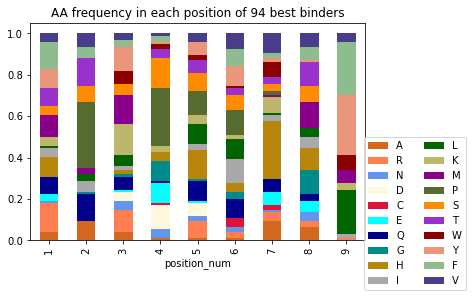

In [12]:
df["position_num"]=df.index
# f_transposed["position"]=df_transposed["index"]
# df.columns.tolist()

df.plot(x="position_num", kind='bar', stacked=True, 
       title='AA frequency in each position of 94 best binders',color=colors) 
plt.legend(loc="lower center",bbox_to_anchor=(1.15, -0.25), ncol= 2)

In [13]:
# doing the same to the worst binders
worst_binders=peptide_df[peptide_df["WB"]>=5]

worst_binders

,Peptide,HLA-A*3301,HLA-B*4001,HLA-A*3101,HLA-A*0101,HLA-A*3001,HLA-B*5701,HLA-B*0801,HLA-A*2601,HLA-A*1101,...,HLA-B*5301,HLA-A*0203,HLA-B*1501,average,min_rank,av_of_total_binders,NB,SB,WB,known_epitope
0,RTSNLIQHY,5.86,6.88,1.64,0.08,0.38,0.12,24.17,0.29,0.17,...,1.81,12.06,0.13,4.0,0.00,0.63,12,10,5,False
1,RTSNLVQHY,6.10,7.21,1.78,0.08,0.42,0.14,24.57,0.31,0.19,...,1.83,12.23,0.13,5.0,0.00,0.65,12,10,5,False
2,FFYEHPHHF,0.83,2.30,2.46,1.12,2.74,1.53,0.06,0.30,5.24,...,0.23,1.10,0.32,1.0,0.00,0.64,8,9,10,False
3,FFYERPHHF,0.74,2.99,2.49,1.59,2.42,1.78,0.03,0.42,7.03,...,0.42,1.52,0.50,2.0,0.00,0.83,8,8,11,False
4,TAYPHQEVF,8.02,2.42,9.61,2.28,6.96,0.30,0.54,0.28,6.07,...,0.05,7.99,0.14,3.0,0.03,0.71,11,8,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,YLDCPGNLM,16.06,4.82,28.13,0.52,35.74,20.71,2.77,4.32,16.86,...,3.50,1.81,4.78,10.0,0.52,1.00,22,0,5,False
1599,CLMDRVGPY,9.04,33.75,9.05,1.78,15.46,22.10,8.87,0.57,3.57,...,10.26,8.46,0.63,13.0,0.57,1.08,22,0,5,False
1600,LTQHWTHNM,7.40,23.75,8.39,1.75,7.44,1.63,8.59,1.44,9.10,...,4.57,12.15,5.31,7.0,0.85,1.39,22,0,5,False
1602,DVDRLKLRF,7.15,11.33,18.56,0.67,41.43,4.10,1.93,0.61,10.88,...,0.70,25.11,6.24,8.0,0.61,0.96,22,0,5,False


In [14]:
pep_list_wb=[i for i in worst_binders["Peptide"]]
counts_wb={}#dictionary for creating df key is the aa and value is the frequency
for letter in amino_acid_list:
    counts_wb[letter] = [0.0] * len(pep_list_wb[0]) 
# print(counts)
for pos in range(len(pep_list_wb[0])):
    for aa in amino_acid_list:
        counts_wb[aa][pos]=[pep[pos] for pep in pep_list_wb].count(str(aa))/len(pep_list_wb)
        
        
df_wb = pd.DataFrame(counts_wb)
df_wb["position"]=[i for i in range(1,10)]
df_wb.set_index("position", inplace=True)
df_wb

,A,R,N,D,C,E,Q,G,H,I,L,K,M,P,S,T,W,Y,F,V
position,,,,,,,,,,,,,,,,,,,,
1,0.043689,0.092233,0.036408,0.065534,0.014563,0.050971,0.072816,0.012136,0.077670,0.007282,0.038835,0.067961,0.043689,0.000000,0.048544,0.080097,0.004854,0.106796,0.126214,0.009709
2,0.097087,0.004854,0.031553,0.014563,0.000000,0.002427,0.123786,0.021845,0.014563,0.092233,0.075243,0.007282,0.058252,0.019417,0.072816,0.138350,0.002427,0.026699,0.070388,0.126214
3,0.031553,0.031553,0.038835,0.084951,0.016990,0.024272,0.038835,0.024272,0.055825,0.050971,0.067961,0.060680,0.101942,0.036408,0.055825,0.036408,0.084951,0.099515,0.029126,0.029126
4,0.038835,0.007282,0.060680,0.097087,0.026699,0.097087,0.065534,0.055825,0.024272,0.026699,0.038835,0.055825,0.033981,0.145631,0.067961,0.031553,0.021845,0.031553,0.048544,0.024272
5,0.021845,0.080097,0.048544,0.021845,0.000000,0.036408,0.031553,0.038835,0.123786,0.043689,0.106796,0.009709,0.038835,0.101942,0.070388,0.063107,0.031553,0.043689,0.038835,0.048544
6,0.036408,0.033981,0.053398,0.024272,0.016990,0.050971,0.058252,0.070388,0.024272,0.055825,0.104369,0.021845,0.031553,0.118932,0.060680,0.060680,0.019417,0.058252,0.055825,0.043689
7,0.046117,0.053398,0.053398,0.019417,0.019417,0.038835,0.099515,0.009709,0.118932,0.048544,0.031553,0.029126,0.031553,0.106796,0.014563,0.063107,0.048544,0.033981,0.041262,0.092233
8,0.043689,0.067961,0.058252,0.002427,0.058252,0.075243,0.053398,0.080097,0.082524,0.067961,0.050971,0.021845,0.067961,0.024272,0.075243,0.067961,0.007282,0.024272,0.031553,0.038835
9,0.000000,0.007282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016990,0.041262,0.072816,0.004854,0.111650,0.000000,0.000000,0.000000,0.157767,0.281553,0.271845,0.033981


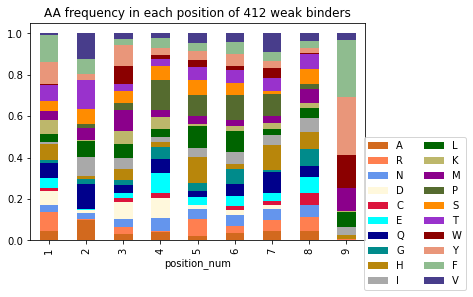

In [15]:
df_wb["position_num"]=df_wb.index
# f_transposed["position"]=df_transposed["index"]
# df.columns.tolist()
df_wb
df_wb.plot(x="position_num", kind='bar', stacked=True, 
       title='AA frequency in each position of 412 weak binders',color=colors) 
plt.legend(loc="lower center",bbox_to_anchor=(1.15, -0.25), ncol= 2)

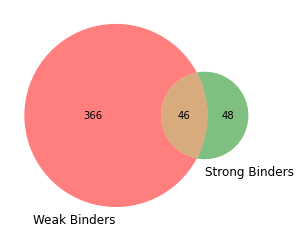

In [16]:
#the stack graphs seems very similar let's check the venn diagram if there is an overlap
venn2(subsets = [set(pep_list_wb), set(pep_list)],set_labels = ('Weak Binders', 'Strong Binders'), set_colors=('r', 'g'), alpha = 0.5)

In [39]:
#let's see the dictribution of AA in the SB
def distribution_plot_func(AA_list,number_of_position):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = [i for i in range(number_of_position)]
    for aa in AA_list:
        amino=df[str(aa)].tolist()
        sns.barplot(x=[1,2,3,4,5,6,7,8,9], y=df[str(aa)])
        matplotlib.pyplot.title("{} amino acid distribution plot".format(str(aa)))
        plt.xlabel("position number"),plt.ylabel("frequencies")
        #plt.plot(langs,amino)
        #plt.draw()
        time.sleep(1)
        #ax.bar(langs,amino)
        #plt.show()   
        #this plots correctly, but blocks execution.
        plt.show(block=False)

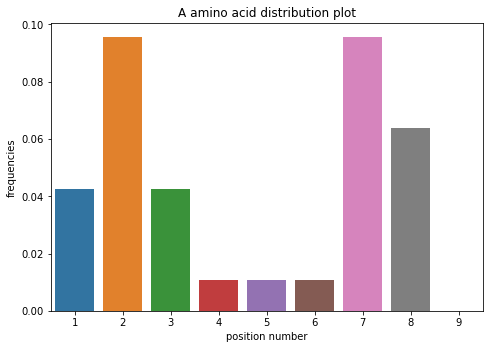

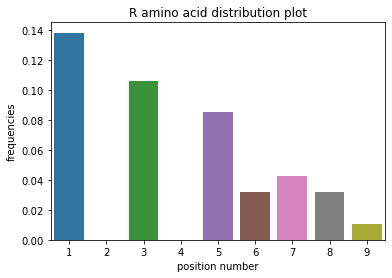

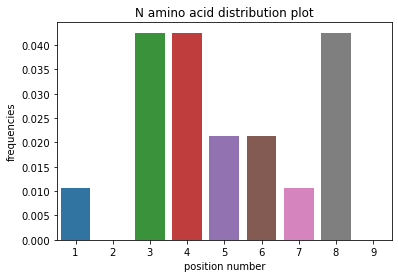

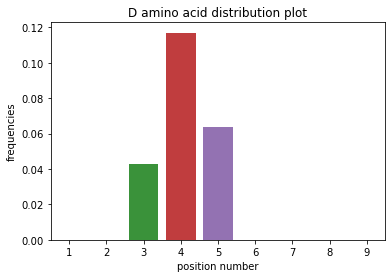

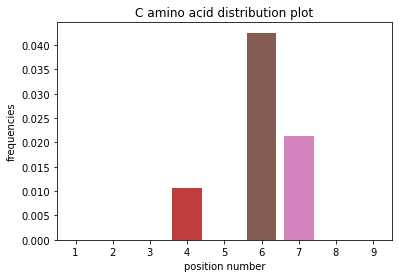

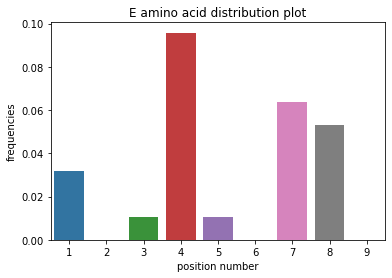

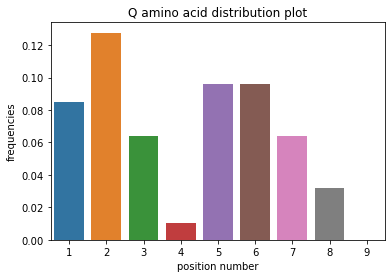

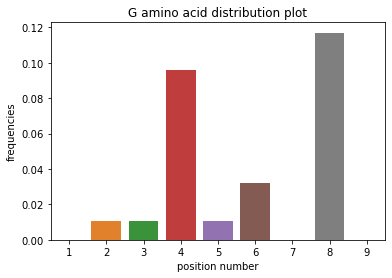

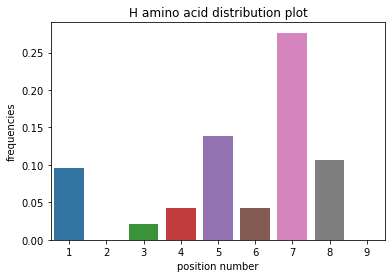

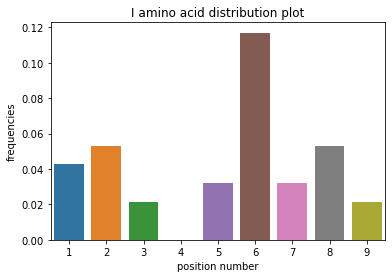

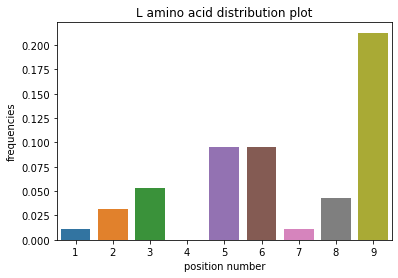

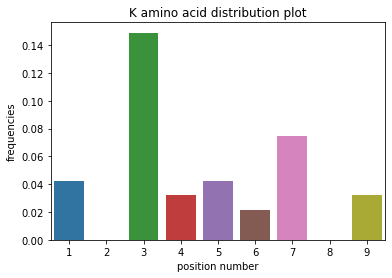

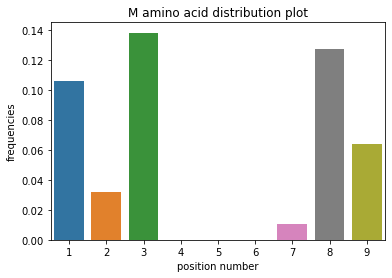

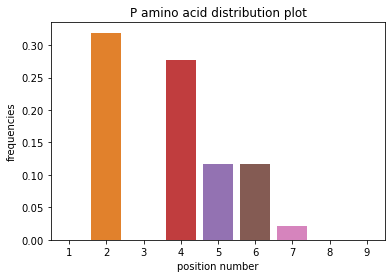

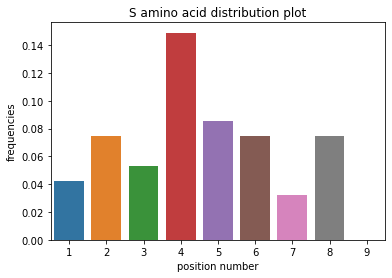

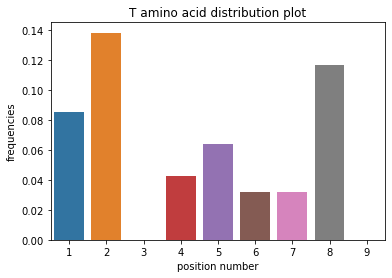

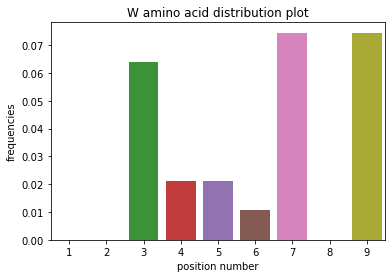

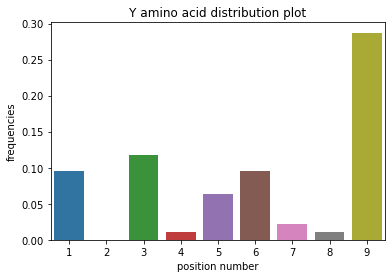

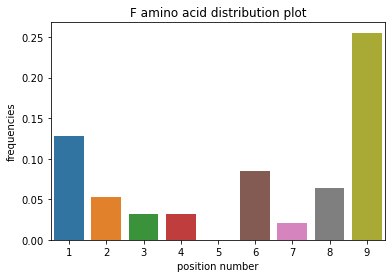

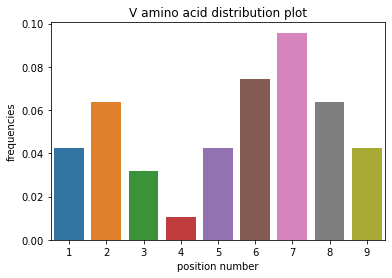

None


In [40]:
print(distribution_plot_func(amino_acid_list,9))

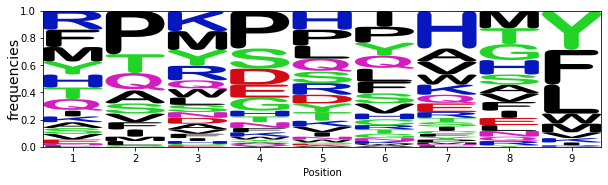

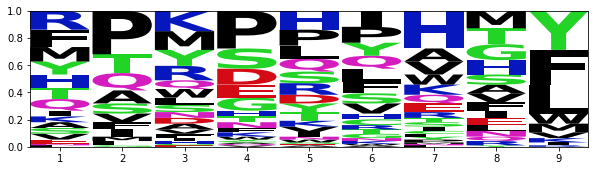

In [68]:
#df
#df=df[~df['position_num']]

# #logo phyton
logo = lm.Logo(df, font_name = 'Arial Rounded MT Bold')
# set axes labels
logo.ax.set_xlabel('Position',fontsize=10)
logo.ax.set_ylabel("frequencies", labelpad=-1,fontsize=14)
lm.Logo(df)



In [78]:
Best_binders.to_csv("Best_binders.csv")

In [18]:
worst_binders.to_csv("worst_binders.csv")
